In [31]:
import numpy as np
import cv2
img=cv2.imread('watch1.jpg',cv2.IMREAD_COLOR)
#opencv we work with BGR
#white (255,255,255)
#black(0,0,0)
cv2.line(img,(0,0),(150,150),(255,255,255),5)
cv2.rectangle(img,(15,15),(200,150),(0,250,0),5)
#-1 fill in the circle
cv2.circle(img,(100,63),55,(0,0,255),-1)
pts=np.array([[200,200],[250,350],[470,420],[550,550],[600,600],[463,390]],np.int32)
# pts=pts.reshape((-1,1,1))
#True connect final point to the start time
cv2.polylines(img,[pts],True,(90,10,244),5)
font =cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV Tuts!',(0,130),font,1,(200,255,255),2,cv2.LINE_AA)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Operations OpenCV Python Tutorial

In [33]:
import cv2
import numpy as np

img = cv2.imread('watch1.jpg',cv2.IMREAD_COLOR)
#Now, we can reference specific pixels, like so:
px = img[55,55]
print(px)
#Next, we could actually change a pixel:
img[55,55] = [255,255,255]
#Then re-reference:
px = img[55,55]
print(px)


[174 213 239]
[255 255 255]


In [34]:
#It should be different now. Next, we can reference an ROI, or Region of Image, like so:

roi = img[100:150,100:150]
print(roi)

[[[164 185 205]
  [164 186 207]
  [165 187 209]
  ...
  [104 180 231]
  [ 77 168 228]
  [ 59 160 225]]

 [[162 186 205]
  [164 187 206]
  [167 189 211]
  ...
  [111 182 234]
  [ 90 175 234]
  [ 72 167 229]]

 [[161 184 203]
  [165 188 207]
  [167 193 212]
  ...
  [129 189 241]
  [107 181 238]
  [ 92 174 234]]

 ...

 [[202 218 238]
  [205 221 241]
  [208 224 244]
  ...
  [196 216 238]
  [184 207 233]
  [182 206 234]]

 [[205 222 245]
  [205 222 245]
  [206 224 246]
  ...
  [179 205 230]
  [173 199 229]
  [181 206 239]]

 [[204 221 243]
  [204 221 243]
  [205 222 245]
  ...
  [173 203 230]
  [178 206 237]
  [174 199 232]]]


In [43]:
#We can also modify the ROI, like this:

img[100:150,100:150] = [255,255,255]
watch_face=img[250:400,250:400]
img[0:150,0:150]=watch_face
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
# We can reference certain characteristics of our image:
print(img.shape)
print(img.size)
print(img.dtype)


(640, 640, 3)
1228800
uint8


# Image arithmetics and Logic OpenCV Python Tutorial

In [44]:
import cv2
import numpy as np

# 500 x 250
img1 = cv2.imread('3D-Matplotlib.png')
img2 = cv2.imread('mainsvmimage.png')
add = img1+img2
cv2.imshow('add',add)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [45]:
#  OpenCV has an "add" method, let's see what that does, replacing the previous "add" with:
import cv2
import numpy as np

# 500 x 250
img1 = cv2.imread('3D-Matplotlib.png')
img2 = cv2.imread('mainsvmimage.png')
add = cv2.add(img1,img2)
cv2.imshow('add',add)
cv2.waitKey(0)
cv2.destroyAllWindows()
#Probably not the ideal here either. We can see that much of the image is very "white." This is because colors are 0-255, where 255 is "full light." Thus, for example: (155,211,79) + (50, 170, 200) = 205, 381, 279...translated to (205, 255,255)

In [46]:
# Next, we can add images, and have each carry a different "weight" so to speak. Here's how that might work:

import cv2
import numpy as np

img1 = cv2.imread('3D-Matplotlib.png')
img2 = cv2.imread('mainsvmimage.png')
#For the addWeighted method, the parameters are the first image, the weight(60%), the second image, that weight(40%), and then finally gamma, which is a measurement of light. We'll leave that at zero for now.
weighted = cv2.addWeighted(img1, 0.6, img2, 0.4, 0)
cv2.imshow('weighted',weighted)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
import cv2
import numpy as np

# Load two images
img1 = cv2.imread('3D-Matplotlib.png')
img2 = cv2.imread('mainlogo.png')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# add a threshold(threshold value-220 ,if pixel value > threshold value it will be converted to white (255) else pixel value converted to black(0))
ret, mask = cv2.threshold(img2gray, 220, 255, cv2.THRESH_BINARY_INV)
# cv2.imshow('mask',mask)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
cv2.imshow('img1_bg',img1_bg)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Thresholding OpenCV Python Tutorial


In [33]:
import cv2
import numpy as np
img= cv2.imread('bookpage.jpg')
retval, threshold =cv2.threshold(img,12,255,cv2.THRESH_BINARY)
grayscaled=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
retval2, threshold2 = cv2.threshold(grayscaled,12,255,cv2.THRESH_BINARY)
gaus=cv2.adaptiveThreshold(grayscaled,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 115, 1)
# There is another version of thresholding that one can do, called Otsu's threshold. It doesn't serve us well here, but:
retval3,otsu = cv2.threshold(grayscaled,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow('original',img)
cv2.imshow('threshold',threshold)
cv2.imshow('threshold2',threshold2)
cv2.imshow('Adaptive threshold',gaus)
cv2.imshow('Otsu threshold',otsu)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Color Filtering OpenCV Python Tutorial

In [46]:
import cv2
import numpy as np

cap=cv2.VideoCapture(0)
while True:
    _,frame=cap.read()
    #HSV, which is "Hue Saturation Value."
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([150,150,50])
    upper_red = np.array([180,255,150])
    cv2.imshow('hsv',hsv)
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

# Blurring and Smoothing OpenCV Python Tutorial

In [60]:
#As you can see, we have a lot of black dots where we'd prefer red, and a lot of other colored dots scattered about. We can use various blurring and smoothing techniques to attempt to remedy this a bit. We can start with some familiar code:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):

    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_yello = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)
    #Now, let's apply a simple smoothing, where we do a sort of averaging per block of pixels. In our case, let's do a 15 x 15 square, which means we have 225 total pixels.
    kernel = np.ones((3,3),np.float32)/9
    smoothed = cv2.filter2D(res,-1,kernel)
    #This one is simple enough, but the result sacrifices a lot of granularity. Next, let's try some Gaussian Blurring:
    blur = cv2.GaussianBlur(res,(15,15),0)
    #Another option is what is called Median Blur:

    median = cv2.medianBlur(res,15)
    #Finally, another option is the bilateral blur:

    bilateral = cv2.bilateralFilter(res,15,75,75)
   
    cv2.imshow('Original',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('Averaging',smoothed)
    cv2.imshow('Gaussian Blurring',blur)
    cv2.imshow('Median Blur',median)
    cv2.imshow('bilateral Blur',bilateral)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

# Morphological Transformations OpenCV Python Tutorial


In [63]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):

    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(mask,kernel,iterations = 1)
    dilation = cv2.dilate(mask,kernel,iterations = 1)
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
      # It is the difference between input image and Opening of the image
    #cv2.imshow('Tophat',tophat)

    # It is the difference between the closing of the input image and input image.
    #cv2.imshow('Blackhat',blackhat)
    
    cv2.imshow('Original',frame)
    cv2.imshow('Mask',mask)
    cv2.imshow('Erosion',erosion)
    cv2.imshow('Dilation',dilation)
    cv2.imshow('Opening',opening)
    cv2.imshow('Closing',closing)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

# Canny Edge Detection and Gradients OpenCV Python Tutorial

In [5]:
#gradients 
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    laplacian = cv2.Laplacian(frame,cv2.CV_64F)
    sobelx = cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5)

    cv2.imshow('Original',frame)
    cv2.imshow('laplacian',laplacian)
    cv2.imshow('sobelx',sobelx)
    cv2.imshow('sobely',sobely)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

In [2]:
#canny Edge Detector
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):

    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)


    cv2.imshow('Original',frame)
    edges = cv2.Canny(frame,100,200)
    cv2.imshow('Edges',edges)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

# Template Matching OpenCV Python Tutorial

In [1]:
import cv2
import numpy as np

img_rgb = cv2.imread('opencv-template-matching-python-tutorial.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('opencv-template-for-matching.jpg',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

cv2.imshow('Detected',img_rgb)

# GrabCut Foreground Extraction OpenCV Python Tutorial

Welcome to a foreground extraction tutorial with OpenCV and Python. The idea here is to find the foreground, and remove the background. This is much like what a green screen does, only here we wont actually need the green screen.

To start, we will use an image:
    Thus far, we've imported cv2, numpy, and matplotlib. Then we load in the image, create a mask, specify the background and foreground model, which is used by the algorithm internally. The real important part is the rect we define. This is rect = (start_x, start_y, width, height).

This is the rectangle that encases our main object. If you're using my image, that is the rect to use. If you use your own, find the proper coordinates for your image.

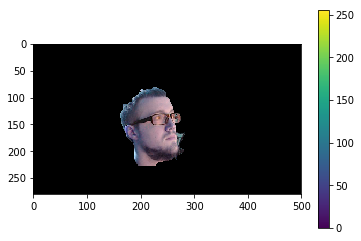

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('opencv-python-foreground-extraction-tutorial.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (161,79,150,150)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

# Corner Detection OpenCV Python Tutorial

In [4]:
# Welcome to a corner detection with OpenCV and Python tutorial. The purpose of detecting corners is to track things like motion, do 3D modeling, and recognize objects, shapes, and characters.
import numpy as np
import cv2

img = cv2.imread('opencv-corner-detection-sample.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)
for corner in corners:
    x,y = corner.ravel()
    cv2.circle(img,(x,y),3,255,-1)
    
cv2.imshow('Corner',img)

# Feature Matching (Homography) Brute Force OpenCV Python Tutorial

Here, our template image is a bit smaller in the template than in the image we're going to search. It is also a different rotation, and has some different shadows.

Now we're going to use a form of "brute force" matching. We're going to find all features in both images. Then we match these features. We then can draw out as many as we want. Careful though. If you draw say 500 matches, you're going to have a lot of false positives. Draw the first few only.

In [3]:

import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('opencv-feature-matching-template.jpg',1)
img2 = cv2.imread('opencv-feature-matching-image.jpg',1)
#So far we've imported the modules we're going to use, and defined our two images, the template (img1) and the image we're going to search for the template in (img2).

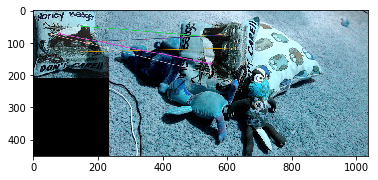

In [4]:
orb = cv2.ORB_create()
#This is the detector we're going to use for the features.

kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
# Here, we find the key points and their descriptors with the orb detector.

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# This is our BFMatcher object.

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
#Here we create matches of the descriptors, then we sort them based on their distances.

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)
plt.imshow(img3)
plt.show()

# MOG Background Reduction OpenCV Python Tutorial

In this OpenCV with Python tutorial, we're going to be covering how to reduce the background of images, by detecting motion. This is going to require us to re-visit the use of video, or to have two images, one with the absense of people/objects you want to track, and another with the objects/people there. You can use your webcam if you like, or use a video like:

In [5]:
import numpy as np
import cv2

cap = cv2.VideoCapture('people-walking.mp4')
fgbg = cv2.createBackgroundSubtractorMOG2()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)
 
    cv2.imshow('fgmask',frame)
    cv2.imshow('frame',fgmask)

    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    

cap.release()
cv2.destroyAllWindows()

The idea here is to extract the moving forground from the static background. You can also use this to compare two similar images, and immediately extract the differences between them.

In our case, we can see we've definitely detected some people, but we do have some "noise" The noise is actually tree leaves moving a bit in the ambient wind. If only we knew of a way to diminish noise. Oh wait! we do! A wild challenge has appeared for you +=1 folks!